In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jun  8 10:11:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


## 1. Cargar el código desde github

In [3]:
!git clone https://github.com/germanpadua/GCN-Pseudo-Riemannian-Manifold

Cloning into 'GCN-Pseudo-Riemannian-Manifold'...
remote: Enumerating objects: 594, done.
remote: Counting objects: 100% (594/594), done.
remote: Compressing objects: 100% (321/321), done.
remote: Total 594 (delta 302), reused 477 (delta 242), pack-reused 0
Receiving objects: 100% (594/594), 18.04 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (302/302), done.


Instalar versión anterior de networkx

In [4]:
!pip install networkx==2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.

He cambiado np.int a int en el codigo, ya que en numpy ya no se utiliza np.int

Dejamos preparado el entorno para ejecutar y ver los resultados

In [5]:
%cd GCN-Pseudo-Riemannian-Manifold

/content/GCN-Pseudo-Riemannian-Manifold


In [6]:
import os

os.environ['LOG_DIR'] = '/content/logs'

In [7]:
os.environ['DATAPATH'] = '/content/GCN-Pseudo-Riemannian-Manifold/data'

## 2. Ejecución

Parámetros

In [ ]:
!python train.py -h

usage: train.py [-h] [--lr LR] [--dropout DROPOUT] [--cuda CUDA] [--epochs EPOCHS]
                [--weight-decay WEIGHT_DECAY] [--optimizer OPTIMIZER] [--momentum MOMENTUM]
                [--patience PATIENCE] [--seed SEED] [--log-freq LOG_FREQ] [--eval-freq EVAL_FREQ]
                [--save SAVE] [--save-dir SAVE_DIR] [--sweep-c SWEEP_C]
                [--lr-reduce-freq LR_REDUCE_FREQ] [--gamma GAMMA] [--print-epoch PRINT_EPOCH]
                [--grad-clip GRAD_CLIP] [--min-epochs MIN_EPOCHS] [--task TASK] [--model MODEL]
                [--dim DIM] [--manifold MANIFOLD] [--c C] [--r R] [--t T]
                [--pretrained-embeddings PRETRAINED_EMBEDDINGS] [--pos-weight POS_WEIGHT]
                [--num-layers NUM_LAYERS] [--bias BIAS] [--act ACT] [--n-heads N_HEADS]
                [--alpha ALPHA] [--double-precision DOUBLE_PRECISION] [--use-att USE_ATT]
                [--local-agg LOCAL_AGG] [--space_dim SPACE_DIM] [--time_dim TIME_DIM]
                [--dataset DATASET] [

### Link Prediction


#### Datasets

md: 'disease_md','grid','tree','tree_cycle','tree_grid','cycle_tree','sphere','cycle', 'cs_phd', 'power', 'facebook', 'random', 'club','nips','bio-diseasome','bio-wormnet','california','grqc','road-m','web-edu',

'toroidal','spherical','uniform_tree','random_geometric_graph','ring_of_tree','erdos_graph','tree_with_random_cycle'

In [ ]:
!python train.py --task lp --dataset power --cuda 0 --model HGCN --manifold PseudoHyperboloid --act None

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): HGCN(
    (layers): Sequential(
      (0): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=4942, out_features=128, c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (agg): HypAgg(c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (hyp_act): HypAct(c_in=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>), c_out=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
      )
      (1): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=128, out_features=128, c=tensor([-1.], d

lp: 'cora', 'pubmed','citeseer', 'disease_lp'

#### Ejecuciones de prueba

In [17]:
!python train.py --task lp --dataset cora --model HGCN --manifold PseudoHyperboloid --act None

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): HGCN(
    (layers): Sequential(
      (0): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=1434, out_features=128, c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (agg): HypAgg(c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (hyp_act): HypAct(c_in=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>), c_out=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
      )
      (1): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=128, out_features=128, c=tensor([-1.], 

In [28]:
!python train.py --task lp --dataset photo --cuda 0 --model HGCN --manifold PseudoHyperboloid --test-prop 0.65 --val-prop 0.2

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): HGCN(
    (layers): Sequential(
      (0): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=746, out_features=128, c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (agg): HypAgg(c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (hyp_act): HypAct(c_in=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>), c_out=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
      )
      (1): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=128, out_features=128, c=tensor([-1.], d

In [18]:
!python train.py --task lp --dataset cora --model HGCN --manifold PseudoHyperboloid --act relu

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): HGCN(
    (layers): Sequential(
      (0): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=1434, out_features=128, c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (agg): HypAgg(c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (hyp_act): HypAct(c_in=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>), c_out=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
      )
      (1): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=128, out_features=128, c=tensor([-1.], 

In [ ]:
!python train.py --task lp --dataset cora --model HGCN --manifold PseudoHyperboloid --cuda -1

INFO:root:Using: cpu
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): HGCN(
    (layers): Sequential(
      (0): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=1434, out_features=128, c=tensor([-1.], requires_grad=True))
        (agg): HypAgg(c=tensor([-1.], requires_grad=True))
        (hyp_act): HypAct(c_in=tensor([-1.], requires_grad=True), c_out=tensor([-1.], requires_grad=True))
      )
      (1): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=128, out_features=128, c=tensor([-1.], requires_grad=True))
        (agg): HypAgg(c=tensor([-1.], requires_grad=True))
        (hyp_act): H

Error al poner la función de activación con Graph Convolutional Networks:

In [ ]:
!python train.py --task lp --dataset cora --cuda -1

INFO:root:Using: cpu
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=1433, output_dim=128
        (linear): Linear(in_features=1433, out_features=128, bias=True)
      )
      (1): GraphConvolution(
        input_dim=128, output_dim=128
        (linear): Linear(in_features=128, out_features=128, bias=True)
      )
    )
  )
  (dc): FermiDiracDecoder()
)
INFO:root:Total number of parameters: 200064
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Error detected in ReluBackward0. Traceback of forward call that caused t

He encontrado los datasets pubmed y citeseer en https://github.com/tkipf/gcn/tree/master

He encontrado los datasets disease_ncm, disease_lp y airport en https://github.com/HazyResearch/hgcn/tree/master

El dataset pubmed no me ha funcionado

In [ ]:
!python train.py --task lp --dataset pubmed --cuda -1 --act None

INFO:root:Using: cpu
INFO:root:Using seed 1234.
^C


In [19]:
!python train.py --task lp --dataset citeseer --cuda -1 --act None

INFO:root:Using: cpu
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=3703, output_dim=128
        (linear): Linear(in_features=3703, out_features=128, bias=True)
      )
      (1): GraphConvolution(
        input_dim=128, output_dim=128
        (linear): Linear(in_features=128, out_features=128, bias=True)
      )
    )
  )
  (dc): FermiDiracDecoder()
)
INFO:root:Total number of parameters: 490624
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:402: UserWarning: To get the last learning rate computed by the scheduler, please use

In [20]:
!python train.py --task lp --dataset disease_lp --cuda 0

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=11, output_dim=128
        (linear): Linear(in_features=11, out_features=128, bias=True)
      )
      (1): GraphConvolution(
        input_dim=128, output_dim=128
        (linear): Linear(in_features=128, out_features=128, bias=True)
      )
    )
  )
  (dc): FermiDiracDecoder()
)
INFO:root:Total number of parameters: 18048
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Error detected in ReluBackward0. Traceback of forward call that caused th

### Clasificación de nodos

#### Datasets

nc:'citeseer', 'cora', 'pubmed','citeseer', 'disease_nc','tree_cycle','tree_grid','ba_shape', 'airport', 'deezer'

#### Ejecuciones de prueba

In [ ]:
!python train.py --task nc --dataset cora --cuda -1 --act None

INFO:root:Using: cpu
INFO:root:Using seed 1234.
adj shape: (2708, 2708)
features shape: (2708, 1433)
labels shape: torch.Size([2708])
Number of unique classes: 7
Number of classes based on max label value: 7
Unique labels: tensor([0, 1, 2, 3, 4, 5, 6])
Counts of unique labels: tensor([351, 217, 418, 818, 426, 298, 180])
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 7
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=1433, output_dim=128
        (linear): Linear(in_features=1433, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, o

In [ ]:
!python train.py --task nc --dataset pubmed --cuda -1 --act None

INFO:root:Using: cpu
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:89: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 3
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=500, output_dim=128
        (linear): Linear(in_features=500, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, output_dim=3
      (linear): Linear(in_features=128, out_features=3, bias=True)
    )
  )
)
INFO:root:Total number of parameters: 64515
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:402: UserWarning: To get the last learning rate computed by the scheduler

In [21]:
!python train.py --task nc --dataset citeseer --cuda 0

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
adj shape: (3327, 3327)
features shape: (3327, 3703)
labels shape: torch.Size([3327])
Number of unique classes: 6
Number of classes based on max label value: 6
Unique labels: tensor([0, 1, 2, 3, 4, 5])
Counts of unique labels: tensor([264, 590, 668, 701, 596, 508])
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 6
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=3703, output_dim=128
        (linear): Linear(in_features=3703, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, outpu

In [22]:
!python train.py --task nc --dataset disease_nc --cuda 0

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
adj shape: (1044, 1044)
features shape: (1044, 1000)
labels shape: torch.Size([1044])
Number of unique classes: 2
Number of classes based on max label value: 2
Unique labels: tensor([0, 1])
Counts of unique labels: tensor([833, 211])
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 2
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=1000, output_dim=128
        (linear): Linear(in_features=1000, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, output_dim=2
      (linear): Linear(i

CAMBIAR LABELS A ETIQUETAS CONSECUTIVAS PORQUE EL DECODER ESTÁ HECHO CON


```
num_classes_max = int(labels.max().item() + 1)
    print(f'Number of classes based on max label value: {num_classes_max}')
```



EN LUGAR DE


```
num_classes_unique = len(torch.unique(labels))
print(f'Number of unique classes: {num_classes_unique}')
```



In [23]:
!python train.py --task nc --dataset airport --cuda 0

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
adj shape: (3188, 3188)
features shape: (3188, 4)
labels shape: torch.Size([3188])
Number of unique classes: 4
Number of classes based on max label value: 4
Unique labels: tensor([0, 1, 2, 3])
Counts of unique labels: tensor([ 521, 1443,  999,  225])
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 4
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=11, output_dim=128
        (linear): Linear(in_features=11, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, output_dim=4
      (line

In [ ]:
!python train.py --task nc --dataset power --cuda 0 --model HGCN --manifold PseudoHyperboloid --act None

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
adj shape: (4941, 4941)
features shape: (4941, 4941)
labels shape: torch.Size([4941])
Number of unique classes: 5
Number of classes based on max label value: 5
Unique labels: tensor([0, 1, 2, 3, 4])
Counts of unique labels: tensor([2005,  360, 2227,  269,   80])
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:101: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:Num classes: 5
INFO:root:NCModel(
  (encoder): HGCN(
    (layers): Sequential(
      (0): HyperbolicGraphConvolution(
        (linear): HypLinear(in_features=4942, out_features=128, c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackward0>))
        (agg): HypAgg(c=tensor([-1.], device='cuda:0', grad_fn=<ToCopyBackwa

In [16]:
!python train.py --task nc --dataset photo --cuda 0 --model HGCN --manifold PseudoHyperboloid

INFO:root:Using: cuda:0
INFO:root:Using seed 1234.
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:345: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)
adj shape: (7650, 7650)
features shape: torch.Size([7650, 745])
labels shape: torch.Size([7650])
Number of unique classes: 8
Number of classes based on max label value: 8
Unique labels: tensor([0, 1, 2, 3, 4, 5, 6, 7])
Counts of unique labels: tensor([ 369, 1686,  703,  915,  882,  823, 1941,  331])
/content/GCN-Pseudo-Riemannian-Manifold/utils/data_utils.py:104: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape

## 3. Resultados

Funciones para visualizar los resultados

In [ ]:
import matplotlib.pyplot as plt
import re

def plot_training_validation_metrics_nc(log_file):
    # Inicializar listas para almacenar los datos extraídos
    epochs = []
    train_loss = []
    train_acc = []
    train_f1 = []
    val_epochs = []  # Lista separada para épocas de validación
    val_loss = []
    val_acc = []
    val_f1 = []

    # Inicializar variables para almacenar los resultados finales
    final_val_loss = final_val_acc = final_val_f1 = final_test_loss = final_test_acc = final_test_f1 = None
    time_total = None

    # Leer el archivo de log
    with open(log_file, 'r') as file:
        log_text = file.read()
        lines = log_text.splitlines()
        for line in lines:
            # Extraer información de las épocas de entrenamiento
            if "Epoch:" in line and "val_loss:" not in line:
                epoch_info = re.findall(r"Epoch: (\d+).*lr: ([\d.]+).*train_loss: ([\d.]+).*train_acc: ([\d.]+).*train_f1: ([\d.]+).*time: ([\d.]+)s", line)
                if epoch_info:
                    epochs.append(int(epoch_info[0][0]))
                    train_loss.append(float(epoch_info[0][2]))
                    train_acc.append(float(epoch_info[0][3]))
                    train_f1.append(float(epoch_info[0][4]))
            # Extraer y alinear la información de validación con las épocas correspondientes
            elif "val_loss:" in line and "Epoch:" in line:
                val_info = re.findall(r"Epoch: (\d+).*val_loss: ([\d.]+) val_acc: ([\d.]+) val_f1: ([\d.]+)", line)
                if val_info:
                    val_epochs.append(int(val_info[0][0]))  # Asegurar alineación con las épocas de entrenamiento
                    val_loss.append(float(val_info[0][1]))
                    val_acc.append(float(val_info[0][2]))
                    val_f1.append(float(val_info[0][3]))
            # Extraer resultados finales de validación y prueba
            elif "Val set results:" in line:
                final_val_info = re.findall(r"val_loss: ([\d.]+) val_acc: ([\d.]+) val_f1: ([\d.]+)", line)
                if final_val_info:
                    final_val_loss = float(final_val_info[0][0])
                    final_val_acc = float(final_val_info[0][1])
                    final_val_f1 = float(final_val_info[0][2])
            elif "Test set results:" in line:
                final_test_info = re.findall(r"test_loss: ([\d.]+) test_acc: ([\d.]+) test_f1: ([\d.]+)", line)
                if final_test_info:
                    final_test_loss = float(final_test_info[0][0])
                    final_test_acc = float(final_test_info[0][1])
                    final_test_f1 = float(final_test_info[0][2])
            # Extraer el tiempo total de ejecución
            elif "Total time elapsed:" in line:
                time_total_info = re.findall(r"Total time elapsed: ([\d.]+)", line)
                if time_total_info:
                    time_total = float(time_total_info[0])

    # Asegúrate de que las épocas de entrenamiento y validación se alineen
    assert epochs == val_epochs, "Las listas de épocas de entrenamiento y validación no coinciden."

    # Crear gráficos
    plt.figure(figsize=(12, 8))

    # Gráfico de pérdida
    plt.subplot(3, 1, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Gráfico de precisión
    plt.subplot(3, 1, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Gráfico de puntuación F1
    plt.subplot(3, 1, 3)
    plt.plot(epochs, train_f1, label='Train F1 Score')
    plt.plot(epochs, val_f1, label='Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Imprimir resultados finales
    print(f"Resultados del conjunto de validación:")
    print(f"- Pérdida (Loss): {final_val_loss}")
    print(f"- Precisión (Accuracy): {final_val_acc}")
    print(f"- Puntuación F1 (F1 Score): {final_val_f1}\n")

    print(f"Resultados del conjunto de prueba:")
    print(f"- Pérdida (Loss): {final_test_loss}")
    print(f"- Precisión (Accuracy): {final_test_acc}")
    print(f"- Puntuación F1 (F1 Score): {final_test_f1}")

    print(f"Tiempo total de ejecución: {time_total}s")


import matplotlib.pyplot as plt
import re

def plot_training_validation_metrics_lp(log_file):
        # Inicializar listas para almacenar los datos extraídos
    epochs = []
    train_loss = []
    train_roc = []
    train_ap = []
    val_epochs = []  # Lista separada para épocas de validación
    val_loss = []
    val_roc = []
    val_ap = []

    # Inicializar variables para resultados finales
    final_val_loss = None
    final_val_roc = None
    final_val_ap = None
    final_test_loss = None
    final_test_roc = None
    final_test_ap = None

    # Leer el archivo de log
    with open(log_file, 'r') as file:
        for line in file:
            # Extraer información de las épocas de entrenamiento
            if "Epoch:" in line and "val_loss:" not in line:
                epoch_info = re.findall(r"Epoch: (\d+).*lr: ([\d.]+).*train_loss: ([\d.]+).*train_roc: ([\d.]+).*train_ap: ([\d.]+).*time: ([\d.]+)s", line)
                if epoch_info:
                    epochs.append(int(epoch_info[0][0]))
                    train_loss.append(float(epoch_info[0][2]))
                    train_roc.append(float(epoch_info[0][3]))
                    train_ap.append(float(epoch_info[0][4]))
            # Extraer y alinear la información de validación con las épocas correspondientes
            elif "val_loss:" in line and "Epoch:" in line:
                val_info = re.findall(r"Epoch: (\d+).*val_loss: ([\d.]+) val_roc: ([\d.]+) val_ap: ([\d.]+)", line)
                if val_info:
                    val_epochs.append(int(val_info[0][0]))  # Asegurar alineación con las épocas de entrenamiento
                    val_loss.append(float(val_info[0][1]))
                    val_roc.append(float(val_info[0][2]))
                    val_ap.append(float(val_info[0][3]))
            # Extraer resultados finales de validación y prueba
            elif "Val set results:" in line:
                final_val_info = re.findall(r"val_loss: ([\d.]+) val_roc: ([\d.]+) val_ap: ([\d.]+)", line)
                if final_val_info:
                    final_val_loss = float(final_val_info[0][0])
                    final_val_roc = float(final_val_info[0][1])
                    final_val_ap = float(final_val_info[0][2])
            elif "Test set results:" in line:
                final_test_info = re.findall(r"test_loss: ([\d.]+) test_roc: ([\d.]+) test_ap: ([\d.]+)", line)
                if final_test_info:
                    final_test_loss = float(final_test_info[0][0])
                    final_test_roc = float(final_test_info[0][1])
                    final_test_ap = float(final_test_info[0][2])

    # Asegúrate de que las épocas de entrenamiento y validación se alineen
    assert epochs == val_epochs, "Las listas de épocas de entrenamiento y validación no coinciden."

    # Crear gráficos
    plt.figure(figsize=(12, 10))

    # Gráfico de pérdida
    plt.subplot(3, 1, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Gráfico de ROC
    plt.subplot(3, 1, 2)
    plt.plot(epochs, train_roc, label='Train ROC')
    plt.plot(epochs, val_roc, label='Validation ROC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC')
    plt.legend()

    # Gráfico de AP
    plt.subplot(3, 1, 3)
    plt.plot(epochs, train_ap, label='Train AP')
    plt.plot(epochs, val_ap, label='Validation AP')
    plt.xlabel('Epochs')
    plt.ylabel('AP')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Imprimir resultados finales
    print("Final Validation Results:")
    print(f"Validation Loss: {final_val_loss}")
    print(f"Validation ROC: {final_val_roc}")
    print(f"Validation AP: {final_val_ap}")
    print("\nFinal Test Results:")
    print(f"Test Loss: {final_test_loss}")
    print(f"Test ROC: {final_test_roc}")
    print(f"Test AP: {final_test_ap}")


### Resultados Node Classification

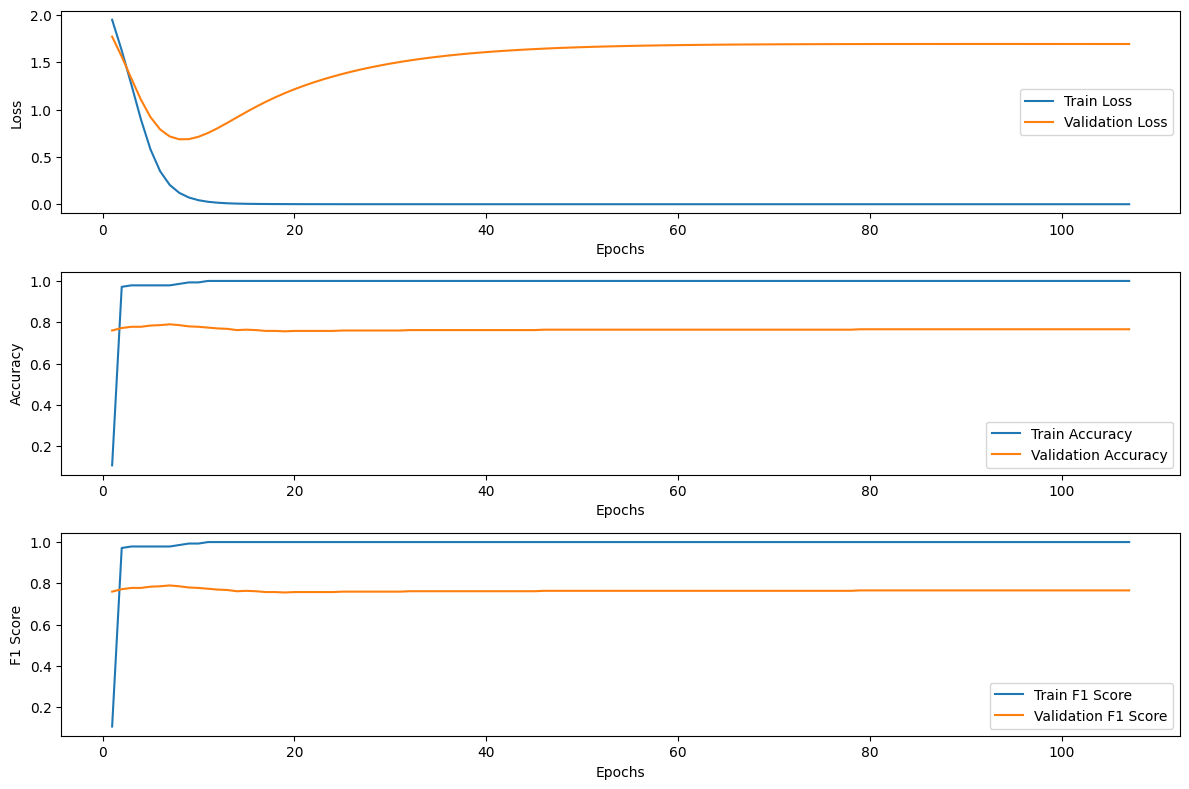

Resultados del conjunto de validación:
- Pérdida (Loss): 0.7162
- Precisión (Accuracy): 0.79
- Puntuación F1 (F1 Score): 0.79

Resultados del conjunto de prueba:
- Pérdida (Loss): 0.6508
- Precisión (Accuracy): 0.799
- Puntuación F1 (F1 Score): 0.799
Tiempo total de ejecución: 2.1872s


In [ ]:
log_file = '/content/logs/nc/2024_5_30/0/log.txt'
plot_training_validation_metrics_nc(log_file)

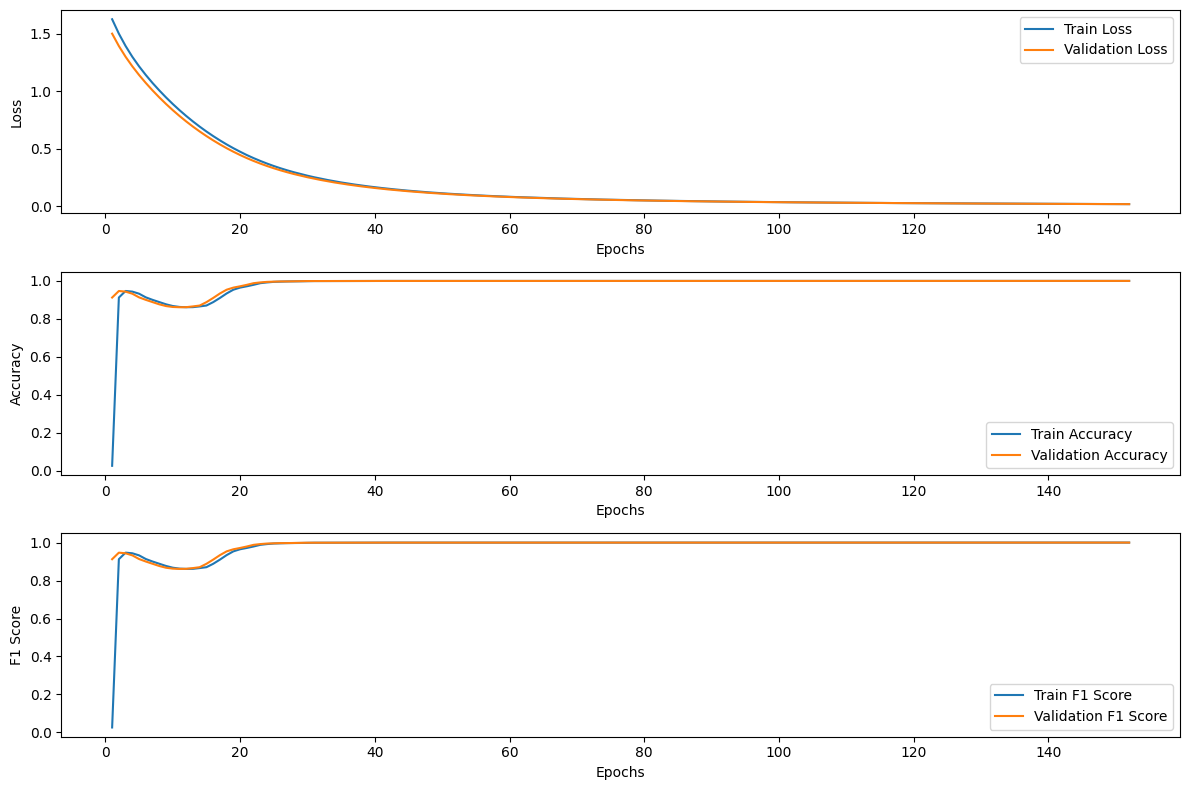

Resultados del conjunto de validación:
- Pérdida (Loss): 0.1022
- Precisión (Accuracy): 1.0
- Puntuación F1 (F1 Score): 1.0

Resultados del conjunto de prueba:
- Pérdida (Loss): 0.102
- Precisión (Accuracy): 1.0
- Puntuación F1 (F1 Score): 1.0
Tiempo total de ejecución: 3539.192s


In [ ]:
log_file = '/content/logs/nc/2024_5_31/9/log.txt'
plot_training_validation_metrics_nc(log_file)

### Resultados Link Prediction

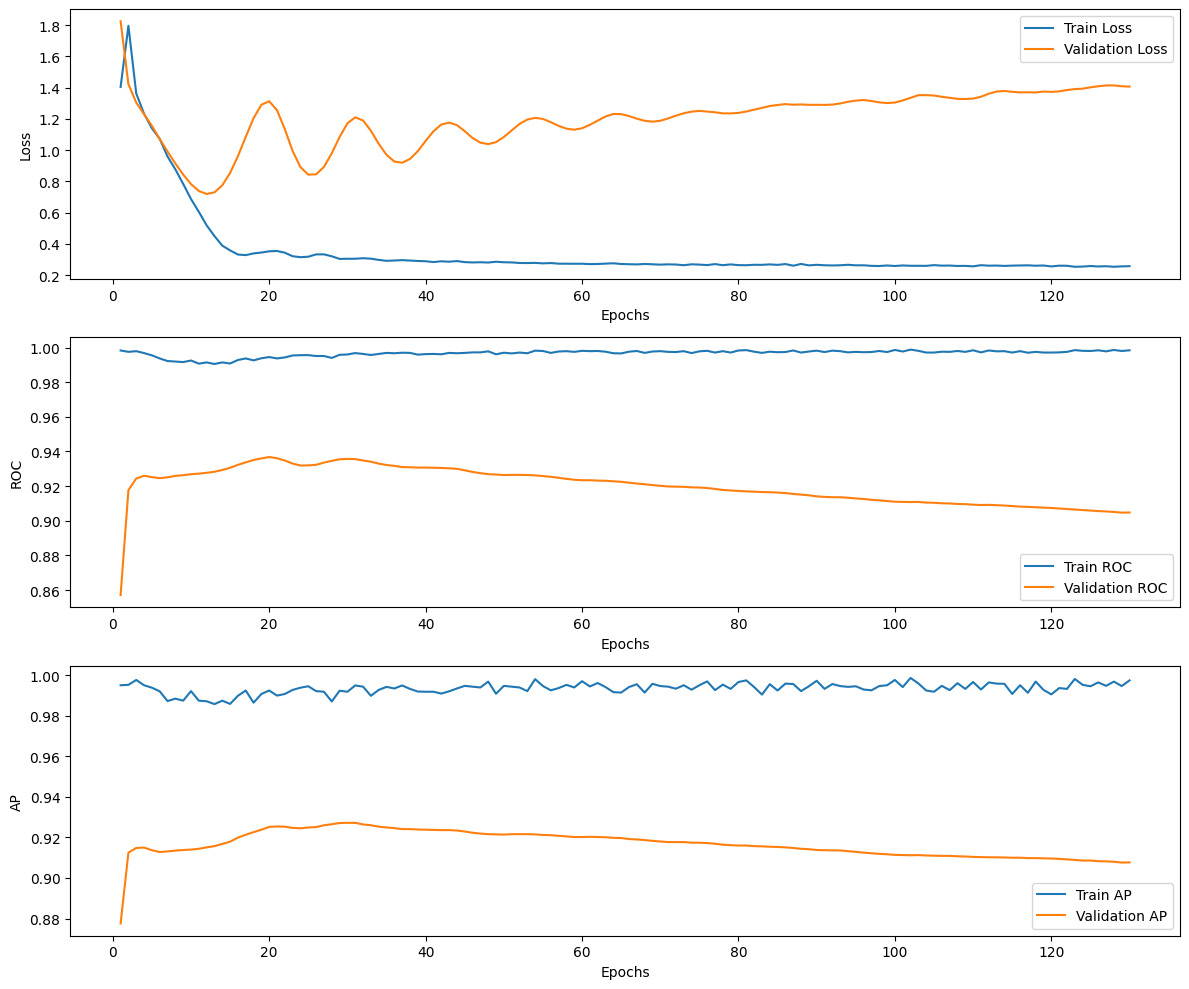

Final Validation Results:
Validation Loss: 1.1709
Validation ROC: 0.9357
Validation AP: 0.9272

Final Test Results:
Test Loss: 1.2719
Test ROC: 0.9388
Test AP: 0.93


In [ ]:
log_file = '/content/logs/lp/2024_5_30/1/log.txt'
plot_training_validation_metrics_lp(log_file)

### Visualización de embeddings

Intento de visualizar los embeddings

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
import os
import sys
import pickle as pkl
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import geoopt
import torch
import umap
from sklearn.decomposition import PCA


def parse_index_file(filename):
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index

# Cargar los datos de Cora
dataset_str = 'cora'
data_path = '/content/GCN-Pseudo-Riemannian-Manifold/data/cora/'
adj, features, labels, idx_train, idx_val, idx_test = load_citation_data(dataset_str, data_path)

# Cargar los embeddings aprendidos
embeddings = np.load('/content/logs/lp/2024_5_30/1/embeddings.npy')

<ipython-input-44-ae6f6f545b14>:23: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  objects.append(pkl.load(f, encoding='latin1'))


In [ ]:
# Verificar que el tamaño de labels y embeddings coincida
assert len(labels) == len(embeddings), "Los tamaños de labels y embeddings no coinciden."

In [ ]:
def spherical_projection(embeddings, labels, method='TSNE'):
    # Reducir la dimensionalidad a 3D usando el método especificado
    if method == 'TSNE':
        reducer = TSNE(n_components=3, random_state=42)
        embeddings_3d = reducer.fit_transform(embeddings)
        title = 'Proyección Esférica usando TSNE'
    elif method == 'PCA':
        reducer = PCA(n_components=3)
        embeddings_3d = reducer.fit_transform(embeddings)
        title = 'Proyección Esférica usando PCA'
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=3, random_state=42)
        embeddings_3d = reducer.fit_transform(embeddings)
        title = 'Proyección Esférica usando UMAP'
    else:
        raise ValueError("Método no soportado. Usa 'TSNE', 'PCA' o 'UMAP'.")

    # Normalizar para proyectar en una esfera
    embeddings_spherical = normalize(embeddings_3d)

    # Visualizar la proyección esférica
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(embeddings_spherical[:, 0], embeddings_spherical[:, 1], embeddings_spherical[:, 2], c=labels, cmap='jet')
    plt.colorbar(sc)
    ax.set_title(title)
    plt.show()

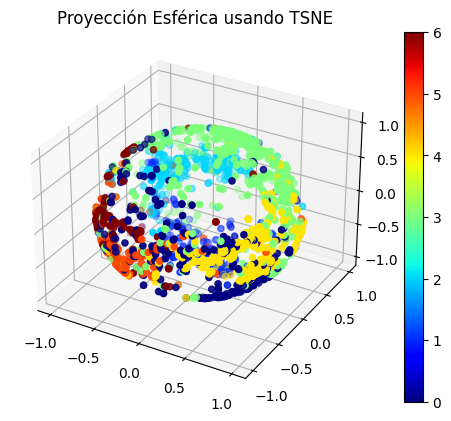

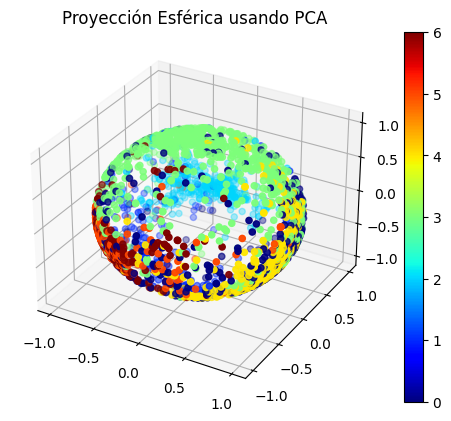

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


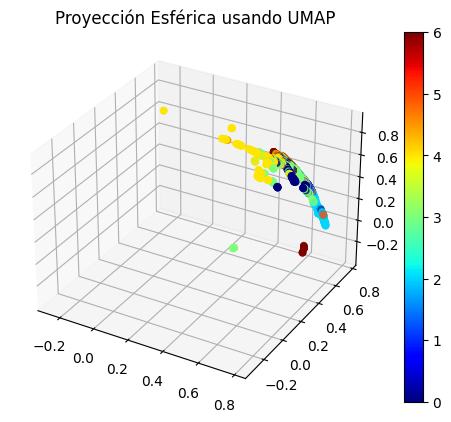

In [ ]:
spherical_projection(embeddings, labels, method='TSNE')
spherical_projection(embeddings, labels, method='PCA')
spherical_projection(embeddings, labels, method='UMAP')

In [ ]:
def hyperbolic_projection(embeddings, labels, method='TSNE'):
    # Proyección hiperbólica usando el Disco de Poincaré con geoopt
    manifold = geoopt.manifolds.PoincareBall(c=1.0)
    embeddings_tensor = torch.tensor(embeddings, dtype=torch.float64)
    embeddings_poincare = manifold.expmap0(embeddings_tensor).detach().numpy()

    # Reducir la dimensionalidad a 3D usando el método especificado
    if method == 'TSNE':
        reducer = TSNE(n_components=3, random_state=42)
        embeddings_3d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (3D) usando TSNE'
    elif method == 'PCA':
        reducer = PCA(n_components=3)
        embeddings_3d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (3D) usando PCA'
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=3, random_state=42)
        embeddings_3d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (3D) usando UMAP'
    else:
        raise ValueError("Método no soportado. Usa 'TSNE', 'PCA' o 'UMAP'.")

    # Visualizar la proyección en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=labels, cmap='jet')
    plt.colorbar(sc)
    ax.set_title(title)
    plt.show()

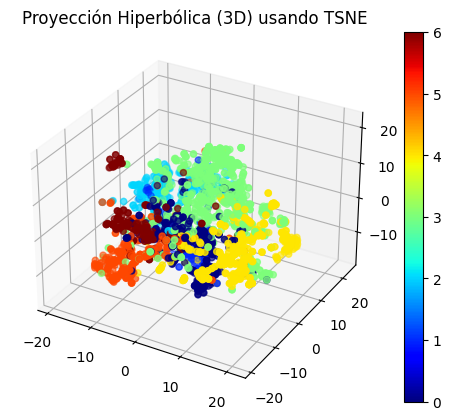

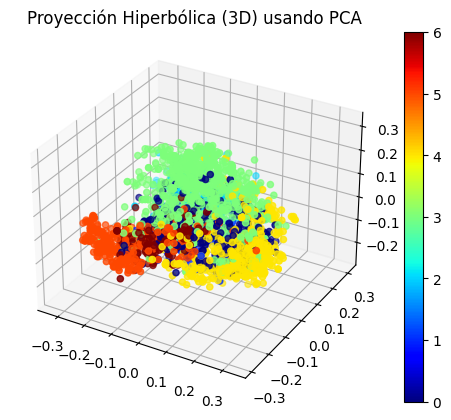

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


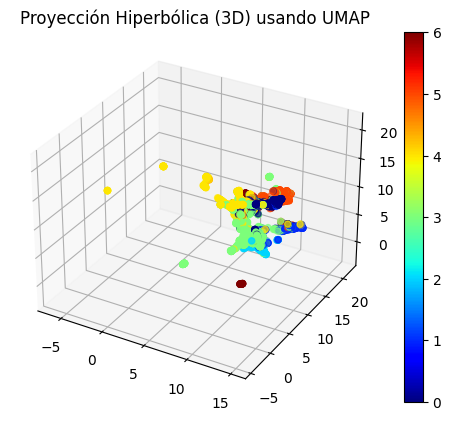

In [ ]:
hyperbolic_projection(embeddings, labels, method='TSNE')
hyperbolic_projection(embeddings, labels, method='PCA')
hyperbolic_projection(embeddings, labels, method='UMAP')

In [ ]:
!pip install geoopt

In [ ]:
import geoopt
import torch
import umap
from sklearn.decomposition import PCA

def poincare_projection(embeddings, labels, method='TSNE'):
    # Proyección hiperbólica usando el Disco de Poincaré con geoopt
    manifold = geoopt.manifolds.PoincareBall(c=1.0)
    embeddings_tensor = torch.tensor(embeddings, dtype=torch.float64)
    embeddings_poincare = manifold.expmap0(embeddings_tensor).detach().numpy()

    # Reducir la dimensionalidad a 2D usando el método especificado
    if method == 'TSNE':
        reducer = TSNE(n_components=2, random_state=42)
        embeddings_2d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando TSNE'
    elif method == 'PCA':
        reducer = PCA(n_components=2)
        embeddings_2d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando PCA'
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=2, random_state=42)
        embeddings_2d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando UMAP'
    else:
        raise ValueError("Método no soportado. Usa 'TSNE', 'PCA' o 'UMAP'.")

    # Visualizar la proyección en el Disco de Poincaré
    fig, ax = plt.subplots()
    sc = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='jet')
    plt.colorbar(sc)
    ax.set_title(title)
    plt.show()

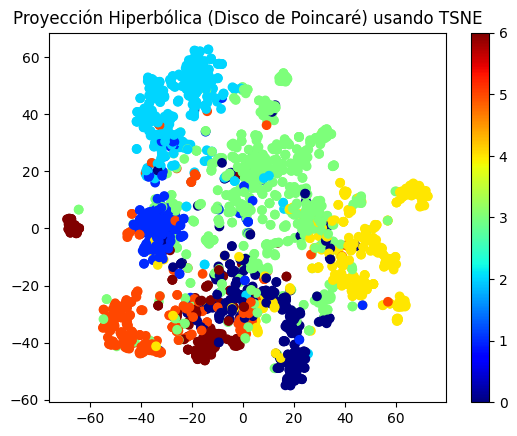

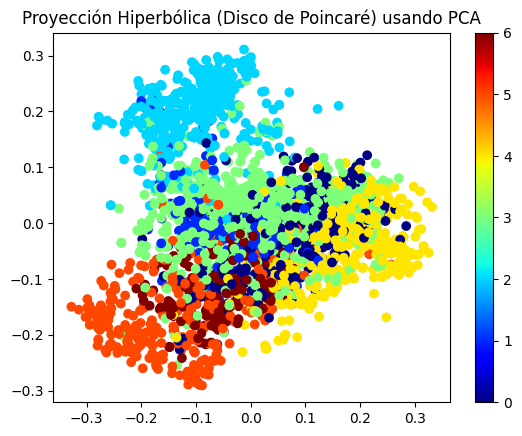

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


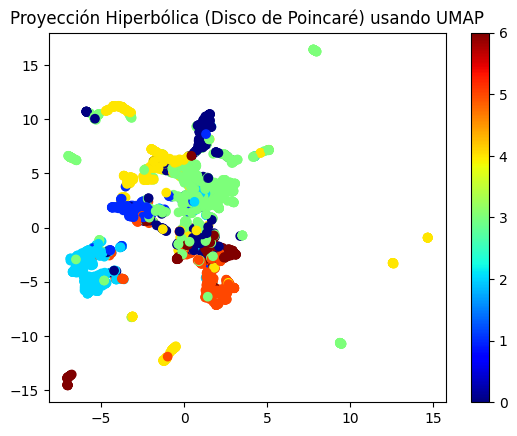

In [ ]:
poincare_projection(embeddings, labels, method='TSNE')
poincare_projection(embeddings, labels, method='PCA')
poincare_projection(embeddings, labels, method='UMAP')

Probar disco de Poincare de: https://lars76.github.io/2020/07/24/implementing-poincare-embedding.html


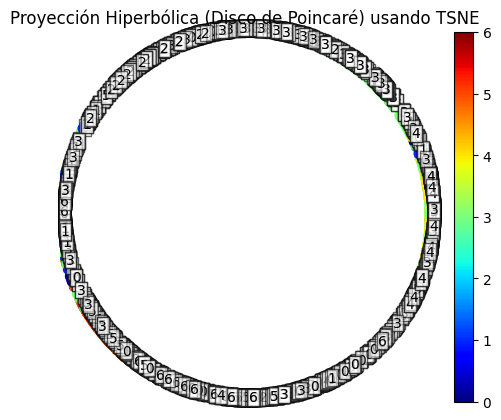

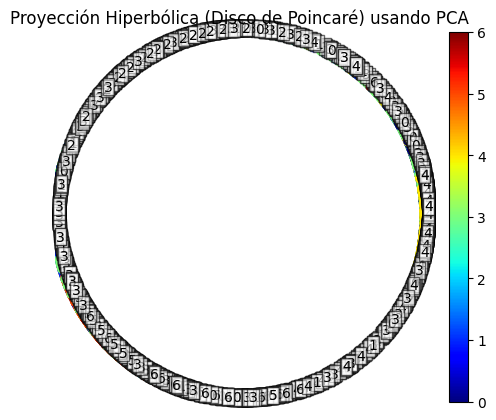

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


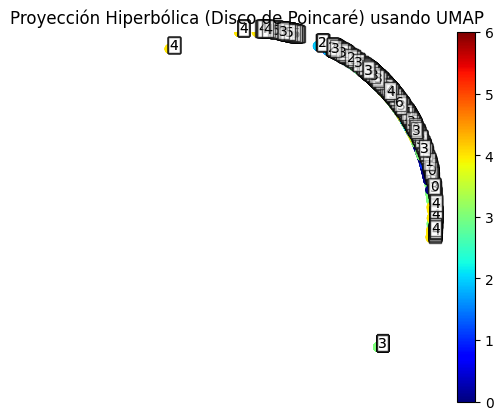

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap



def poincare_projection(embeddings, labels, method='TSNE'):
    # Reducir la dimensionalidad a 2D usando el método especificado
    if method == 'TSNE':
        reducer = TSNE(n_components=2, random_state=42)
        embeddings_2d = reducer.fit_transform(embeddings)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando TSNE'
    elif method == 'PCA':
        reducer = PCA(n_components=2)
        embeddings_2d = reducer.fit_transform(embeddings)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando PCA'
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=2, random_state=42)
        embeddings_2d = reducer.fit_transform(embeddings)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando UMAP'
    else:
        raise ValueError("Método no soportado. Usa 'TSNE', 'PCA' o 'UMAP'.")

    # Proyectar en el disco de Poincaré
    embeddings_2d = embeddings_2d / (np.linalg.norm(embeddings_2d, axis=1, keepdims=True) + 1e-5)

    # Visualizar la proyección en el Disco de Poincaré
    fig, ax = plt.subplots()
    sc = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='jet')
    plt.colorbar(sc)
    ax.set_title(title)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.axis('off')

    # Añadir las etiquetas de los puntos
    for i in range(embeddings_2d.shape[0]):
        ax.annotate(str(labels[i]), (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                    bbox={"fc": "white", "alpha": 0.6, "pad": 1})
    plt.show()



In [ ]:

poincare_projection(embeddings, labels, method='TSNE')
poincare_projection(embeddings, labels, method='PCA')
poincare_projection(embeddings, labels, method='UMAP')


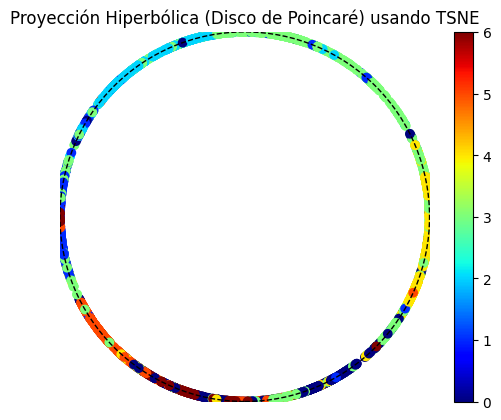

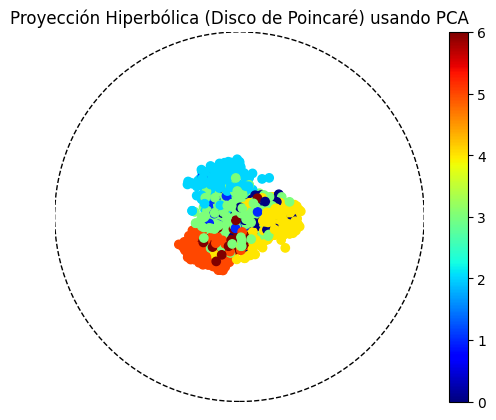

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


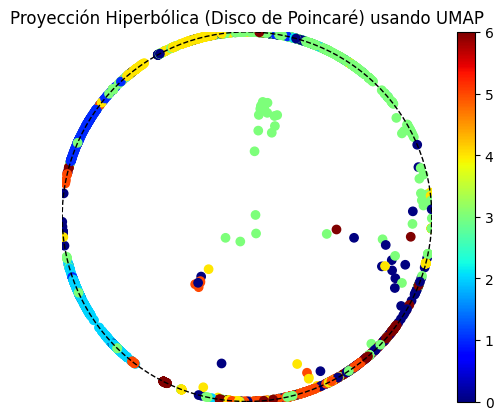

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

def poincare_projection(embeddings, labels, method='TSNE'):
    # Proyección hiperbólica usando el Disco de Poincaré con geoopt
    manifold = geoopt.manifolds.PoincareBall(c=1.0)
    embeddings_tensor = torch.tensor(embeddings, dtype=torch.float64)
    embeddings_poincare = manifold.expmap0(embeddings_tensor).detach().numpy()

    # Reducir la dimensionalidad a 2D usando el método especificado
    if method == 'TSNE':
        reducer = TSNE(n_components=2, random_state=42)
        embeddings_2d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando TSNE'
    elif method == 'PCA':
        reducer = PCA(n_components=2)
        embeddings_2d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando PCA'
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=2, random_state=42)
        embeddings_2d = reducer.fit_transform(embeddings_poincare)
        title = 'Proyección Hiperbólica (Disco de Poincaré) usando UMAP'
    else:
        raise ValueError("Método no soportado. Usa 'TSNE', 'PCA' o 'UMAP'.")

    # Normalizar los embeddings para que caigan dentro del disco de Poincaré
    norm = np.linalg.norm(embeddings_2d, axis=1, keepdims=True)
    embeddings_2d = embeddings_2d / np.maximum(norm, 1)  # Asegurarse de que los puntos están dentro del disco

    # Visualizar la proyección en el Disco de Poincaré
    fig, ax = plt.subplots()
    sc = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='jet')
    plt.colorbar(sc)
    ax.set_title(title)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.axis('off')

    # Dibujar el borde del disco de Poincaré
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Añadir las etiquetas de los puntos
    #for i in range(embeddings_2d.shape[0]):
    #    ax.annotate(str(labels[i]), (embeddings_2d[i, 0], embeddings_2d[i, 1]),
    #                bbox={"fc": "white", "alpha": 0.6, "pad": 1})
    plt.show()

poincare_projection(embeddings, labels, method='TSNE')
poincare_projection(embeddings, labels, method='PCA')
poincare_projection(embeddings, labels, method='UMAP')

